In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import GPy
from GPy.kern import Kern
from GPy import Param, Model

In [230]:
from deepRBF import deepRBF, deep3RBF

In [231]:
auto_df = pd.read_csv('Auto.csv',na_values='?').dropna()
#auto_df.head()
#auto_df.
#auto_df.drop('?')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [232]:
auto_df[['horsepower','displacement','weight','acceleration','mpg']].apply(lambda x: str(x).isnumeric())

horsepower      False
displacement    False
weight          False
acceleration    False
mpg             False
dtype: bool

In [233]:
data = auto_df[['horsepower','displacement','weight','acceleration','mpg']].values

In [234]:
X = data[:,0:4]
y = data[:,-1].reshape(-1,1)

In [235]:
X.shape

(392, 4)

In [236]:
y.shape

(392, 1)

In [237]:
print(X[0:10,:])

[[ 130.   307.  3504.    12. ]
 [ 165.   350.  3693.    11.5]
 [ 150.   318.  3436.    11. ]
 [ 150.   304.  3433.    12. ]
 [ 140.   302.  3449.    10.5]
 [ 198.   429.  4341.    10. ]
 [ 220.   454.  4354.     9. ]
 [ 215.   440.  4312.     8.5]
 [ 225.   455.  4425.    10. ]
 [ 190.   390.  3850.     8.5]]


In [238]:
print(y[0:10])

[[18.]
 [15.]
 [18.]
 [16.]
 [17.]
 [15.]
 [14.]
 [14.]
 [14.]
 [15.]]


In [239]:
#X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

from sklearn.preprocessing import StandardScaler

X_stz = StandardScaler().fit_transform(X)

In [240]:
print(X_stz[0:10,:])

[[ 0.66413273  1.07728956  0.62054034 -1.285258  ]
 [ 1.57459447  1.48873169  0.84333403 -1.46672362]
 [ 1.18439658  1.1825422   0.54038176 -1.64818924]
 [ 1.18439658  1.04858429  0.53684535 -1.285258  ]
 [ 0.92426466  1.02944745  0.5557062  -1.82965485]
 [ 2.43302983  2.244637    1.60719812 -2.01112047]
 [ 3.00532006  2.48384754  1.62252256 -2.3740517 ]
 [ 2.8752541   2.34988964  1.57301285 -2.55551732]
 [ 3.13538603  2.49341597  1.70621754 -2.01112047]
 [ 2.22492429  1.87146856  1.02840604 -2.55551732]]


(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([-1.52097544, -1.0423327 , -0.56368996, -0.08504721,  0.39359553,
         0.87223827,  1.35088102,  1.82952376,  2.3081665 ,  2.78680925,
         3.26545199]),
 <a list of 10 Patch objects>)

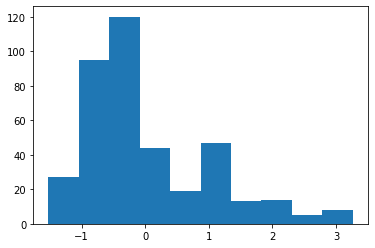

In [241]:
plt.hist(X_stz[:,0])

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <a list of 10 Patch objects>)

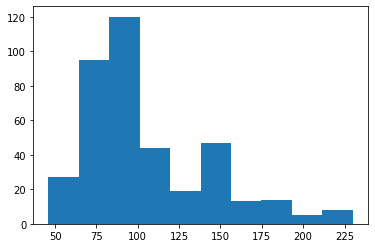

In [242]:
plt.hist(X[:,0])

In [243]:
y_stz = StandardScaler().fit_transform(y)

In [244]:
np.random.seed(59)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stz, y_stz, test_size=0.2)

In [245]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def compute_nll(y, mf, vf):
    y = y.reshape((y.shape[0],))
    ll = -0.5 * np.log(2 * np.pi * vf) - 0.5 * (y - mf)**2 / vf
    nll = -ll
    return np.mean(nll)

# GP RBF

In [246]:
m1 = GPy.models.GPRegression(X_train, y_train)
m1.optimize()

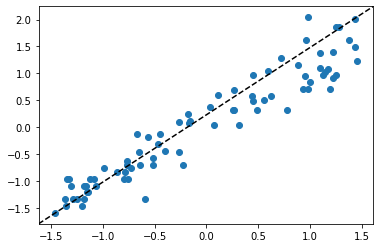

In [247]:
m1f_t, m1v_t = m1.predict(X_test)
m1f_tr, m1v_tr = m1.predict(X_train)

plt.scatter(m1f_t,y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

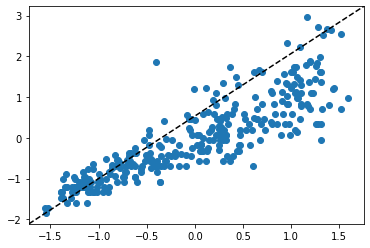

In [248]:
plt.scatter(m1f_tr,y_train)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

# GP deep RBF

In [249]:
d_rbf = deepRBF(input_dim=X_train.shape[1])
m2 = GPy.models.GPRegression(X_train, y_train,d_rbf)
m2.optimize()

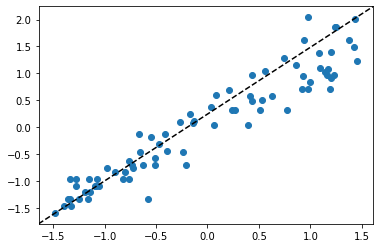

In [250]:
m2f_t, m2v_t = m2.predict(X_test)
m2f_tr, m2v_tr = m2.predict(X_train)

plt.scatter(m2f_t,y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

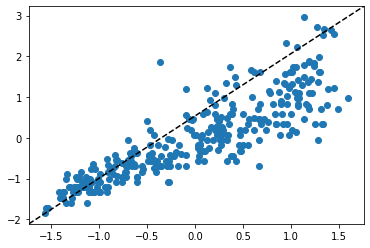

In [251]:
plt.scatter(m2f_tr,y_train)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

# GP deepRBF * RBF

In [252]:
kk = GPy.kern.RBF(input_dim = X_train.shape[1])
kkr = deepRBF(input_dim=X_train.shape[1])

In [253]:
kk_net = kk * kkr

In [254]:
m3 = GPy.models.GPRegression(X_train, y_train,kk_net)
m3.optimize()

In [255]:
print(m3)


Name : GP regression
Objective : 302.5073856092907
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  mul.rbf.variance         |  0.9202979858043058  |      +ve      |        
  mul.rbf.lengthscale      |  1.1247573788809644  |      +ve      |        
  mul.deep_rbf.variance1   |  0.8993888286352272  |               |        
  mul.deep_rbf.lengtscale  |   1.156823378884309  |               |        
  mul.deep_rbf.variance2   |  0.7956246137004489  |               |        
  Gaussian_noise.variance  |  0.5163784057990572  |      +ve      |        


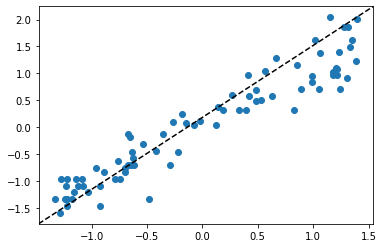

In [256]:
m3f_t, m3v_t = m3.predict(X_test)
m3f_tr, m3v_tr = m3.predict(X_train)

plt.scatter(m3f_t,y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

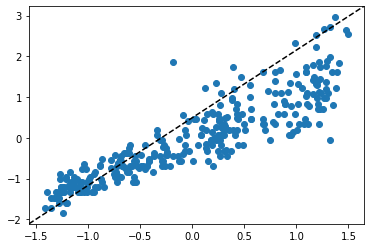

In [257]:
plt.scatter(m3f_tr,y_train)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

# Deep GP RBF+RBF

In [258]:
import deepgp

hidden = 1
m_deep = deepgp.DeepGP([1,hidden,X_train.shape[1]],Y=y_train, X=X_train, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(X_train.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

for layer in m_deep.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m_deep.optimize(messages=True,max_iters=500)

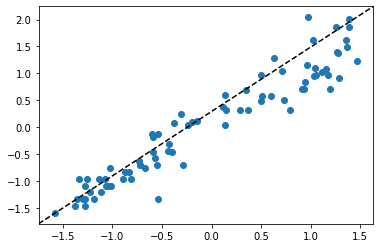

In [259]:
md, vd = m_deep.predict(X_train)
mdt, vdt = m_deep.predict(X_test)

plt.scatter(mdt,y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

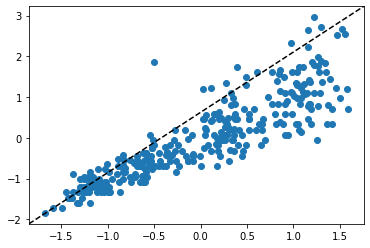

In [260]:
plt.scatter(md,y_train)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

# 3-layer deep3RBF

In [261]:
rbf3 = deep3RBF(input_dim=X_train.shape[1])
m4 = GPy.models.GPRegression(X_train, y_train,rbf3)
m4.optimize()

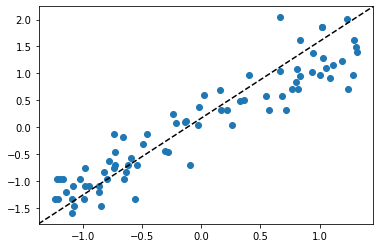

In [262]:
m4f_t, m4v_t = m4.predict(X_test)
m4f_tr, m4v_tr = m4.predict(X_train)

plt.scatter(m4f_t,y_test)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

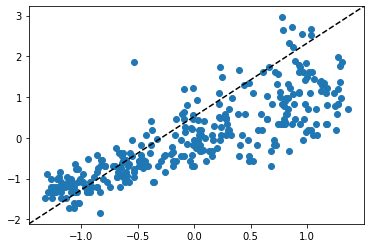

In [263]:
plt.scatter(m4f_tr,y_train)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlim([0,55])
#plt.ylim([0,55])
plt.show()

# GP Report

In [264]:
# test error for GP RBF
print(rmse(m1f_t,y_test))

0.3139605926919285


In [265]:
# Training RMSE for GP RBF
print(rmse(m1f_tr,y_train))

0.4888018166924609


In [266]:
# Test NLL
print(compute_nll(y_test,m1f_t,m1v_t))

3.6547925532846786


In [267]:
# Train NLL
print(compute_nll(y_train,m1f_tr,m1v_tr))

3.4067861341764862


# GP deep RBF Report

In [268]:
# test error for GP deep RBF
print(rmse(m2f_t,y_test))

0.31667386064615144


In [269]:
# Training RMSE for GP deepRBF
print(rmse(m2f_tr,y_train))

0.4957395632157787


In [270]:
# Test NLL
print(compute_nll(y_test,m2f_t,m2v_t))

3.593759382240416


In [271]:
# Train NLL
print(compute_nll(y_train,m2f_tr,m2v_tr))

3.345495588951363


# GP RBF * deepRBF

In [272]:
# test error for GP deep RBF
print(rmse(m3f_t,y_test))

0.3128843114769305


In [273]:
# Training RMSE for GP deepRBF
print(rmse(m3f_tr,y_train))

0.4494249613470009


In [274]:
# Test NLL
print(compute_nll(y_test,m3f_t,m3v_t))

2.186080507707204


In [275]:
# Train NLL
print(compute_nll(y_train,m3f_tr,m3v_tr))

2.094640282178245


# Deep GP Report

In [276]:
print(rmse(y_test,mdt))

0.3067622437047174


In [277]:
print(rmse(y_train,md))

0.4721341754863621


In [278]:
# Test NLL
print(compute_nll(y_test,mdt,vdt))

9.271306592418092


In [279]:
# Train NLL
print(compute_nll(y_train,md,vd))

8.061448350282221


# Deep 3RBF report

In [280]:
# test error for GP deep RBF
print(rmse(m4f_t,y_test))

0.3729758915802854


In [281]:
# Training RMSE for GP deepRBF
print(rmse(m4f_tr,y_train))

0.5620483426949996


In [282]:
# Test NLL
print(compute_nll(y_test,m4f_t,m4v_t))

2.254723479490954


In [283]:
# Train NLL
print(compute_nll(y_train,m4f_tr,m4v_tr))

2.1603337339963318
